In [1]:
%matplotlib inline
import numpy as np
import scipy as sp
import pandas as pd
import matplotlib.pyplot as plt
from descartes import PolygonPatch
import os
import seaborn as sns
import statsmodels as sm
import powerlaw as pl

plt.rcParams['figure.figsize'] = (10.0, 5.0)

/Users/adamgolinski/Documents/University/mphys/crime_science_investigation/venv/lib/python2.7/site-packages/matplotlib/__init__.py:872: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))


In [3]:
crimes = pd.DataFrame()

mypath = './metropolitan_all'
for (dirpath, dirnames, filenames) in os.walk(mypath):
    if dirpath is not './metropolitan_all':
        for filename in filenames:
            if 'csv' in filename and ('2015' in filename or '2014' in filename or '2013' in filename):
                frame = pd.read_csv(dirpath + '/' + filename)
                crimes = crimes.append(frame, ignore_index=True)

len(crimes)

2593139

In [4]:
crime_types = list(crimes['Crime type'].drop_duplicates())

In [5]:
crimes_count = crimes.groupby(['Longitude', 'Latitude', 'Crime type']).size().reset_index().rename(columns={0:'count'})

In [8]:
len(crimes_count)

460999

In [10]:
sum(crimes_count['count'])

2562781

In [15]:
for ctype in crime_types:
    print '{} {}'.format(ctype,max(crimes_count['count'][crimes_count['Crime type'] == ctype]))

Anti-social behaviour 773
Other theft 1590
Public disorder and weapons 24
Violent crime 34
Burglary 48
Criminal damage and arson 142
Drugs 627
Vehicle crime 180
Robbery 68
Shoplifting 1530
Other crime 462
Theft from the person 874
Violence and sexual offences 329
Bicycle theft 136
Possession of weapons 122
Public order 129


In [12]:
import pylab
pylab.rcParams['xtick.major.pad']='8'
pylab.rcParams['ytick.major.pad']='8'
#pylab.rcParams['font.sans-serif']='Arial'

from matplotlib import rc
rc('font', family='sans-serif')
rc('font', size=10.0)
rc('text', usetex=False)


from matplotlib.font_manager import FontProperties

panel_label_font = FontProperties().copy()
panel_label_font.set_weight("bold")
panel_label_font.set_size(12.0)
panel_label_font.set_family("sans-serif")

In [57]:
def plot_basics_ax(data, axes, alphas, xmin=0):
    from powerlaw import plot_pdf, Fit, pdf
    
    if xmin is not 0:
        data = data[data > xmin]
    
    x, y = pdf(data, linear_bins=True)
    ind = y>0
    y = y[ind]
    x = x[:-1]
    x = x[ind]
    ax1.scatter(x, y, color='r', s=.5, ax=axes)
    plot_pdf(data[data>0], ax=axes, linestyle=':', color='b')
    
    fit = Fit(data, xmin=xmin, discrete=True)
    fit.power_law.plot_pdf(ax=axes, linestyle=':', color='g')
    
    return fit.power_law.alpha

In [59]:
def plot_basics(data, crime_type='all'):
    fig = plt.figure(figsize=(8,8))
    units = 'Crime counts'
    data = data[data['count'] < 99999]['count']
    
    annotate_coord = (-.4, .95)
    
    ax1 = fig.add_subplot(1,3,1)
    a = plot_basics_ax(data, ax1)
    alphas_xmin_auto[crime_type] = a
    
    ax2 = fig.add_subplot(1,3,2)
    a = plot_basics_ax(data, ax2, xmin=1)
    alphas_xmin_1[crime_type] = a
    
    ax3 = fig.add_subplot(1,3,3)
    a = plot_basics_ax(data, ax3, xmin=10)
    alphas_xmin_10[crime_type] = a
    
#     R_exp, p_exp = fit.distribution_compare('power_law', 'exponential')
    
    plt.title('crime_type: {}'.format(crime_type))
    
    ax1.set_ylabel(u"p(X)")
    ax1.set_xlabel(units)

In [52]:
alphas = dict()

Calculating best minimal value for power law fit


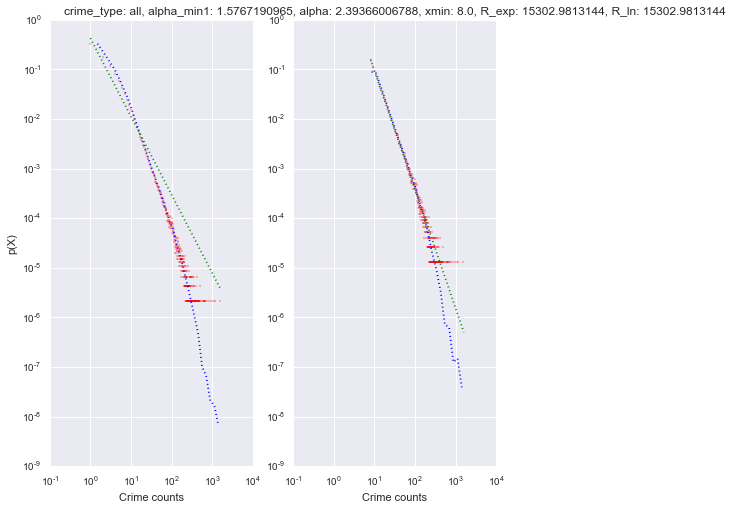

In [40]:
plot_basics(crimes_count)

In [41]:
def pl_fit_and_plot(data, crime_type='all'):
    temp = data[crimes_count['count'] < 99999]['count']
#     temp.hist(bins=max(temp))

    binned = temp.value_counts()
    binned_array = np.ones(max(binned.index)+1)
    binned_array[:] = np.finfo(np.float).tiny
    for i, val in binned.iteritems():
        binned_array[i] = val
    binned_array_norm = np.divide(binned_array, np.linalg.norm(binned_array))

    results = pl.Fit(binned_array, xmin=1.0, xmax=20.0, discrete=True)

    fig = plt.figure()
    ax = fig.add_subplot(111, axisbg='w', frame_on=False)

    a = results.power_law.alpha
    xmin = results.power_law.xmin
    R_exp, p_exp = results.distribution_compare('power_law', 'exponential')
    #R_ln, p_ln = results.distribution_compare('power_law', 'lognormal')
    alphas[crime_type] = a
    plt.title('crime_type: {}, alpha: {}, xmin: {}, R_exp: {}, R_ln: {}'.format(crime_type, a,xmin, R_exp, R_exp))
    
    plt.plot(binned_array_norm)

    x = np.array([x for x in range(1, max(binned.index)+1)])
    y_pl = np.power(x, -a)
    plt.plot(y_pl, 'r--')
    
    #plt.axvline(x=1.0, color='k')
    plt.gca().set_xlim(left=1.0)
    
#     mu = results.lognormal.mu
#     sigma = results.lognormal.sigma
#     y_ln = (np.exp(-(np.log(x) - mu)**2 / (2 * sigma**2)) / (x * sigma * np.sqrt(2 * np.pi)))
#     print('mu: {}, sigma: {}, supported_distributions: {} \n {}'.format(mu, sigma, results.supported_distributions, y_ln))
#     plt.plot(x, y_ln, 'g--')

/Users/adamgolinski/Documents/University/mphys/crime_science_investigation/venv/lib/python2.7/site-packages/pandas/core/frame.py:1942: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  "DataFrame index.", UserWarning)


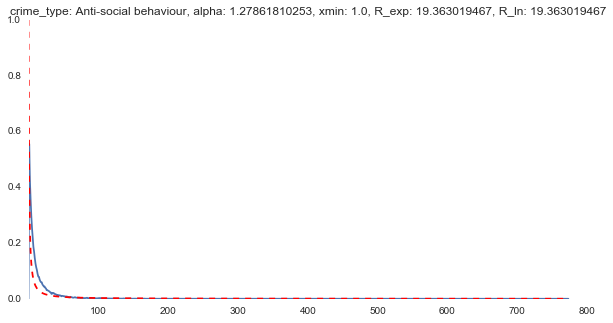

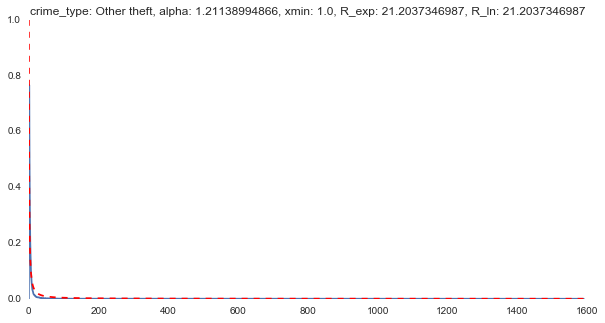

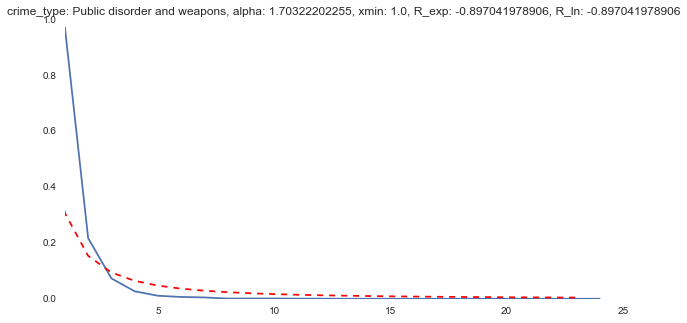

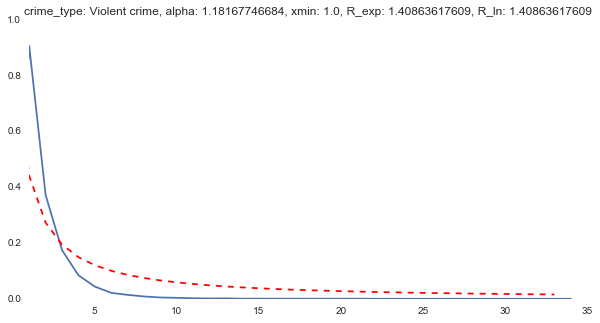

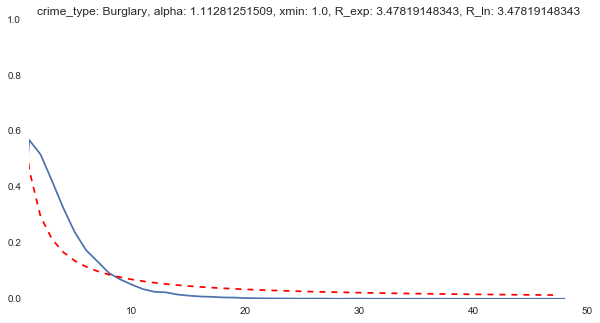

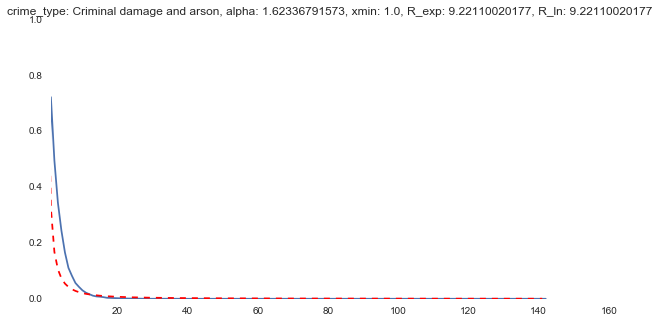

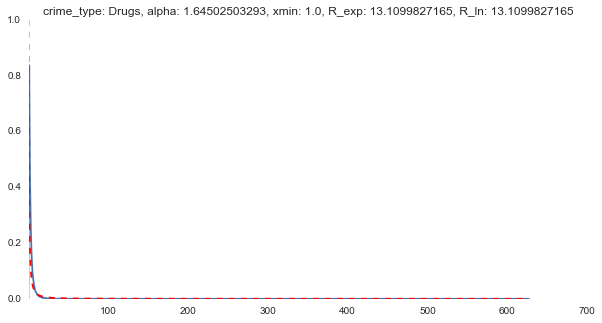

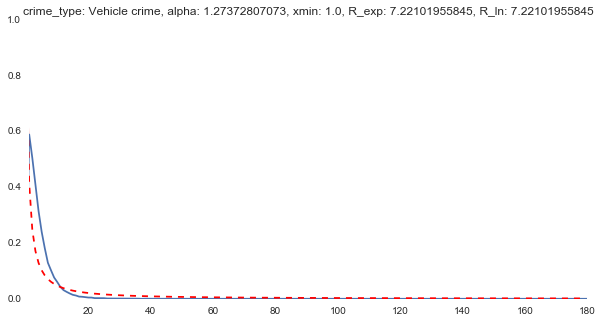

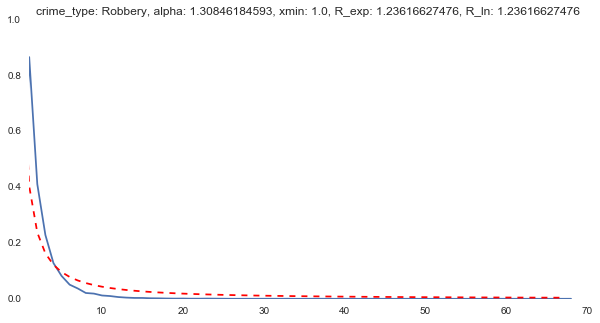

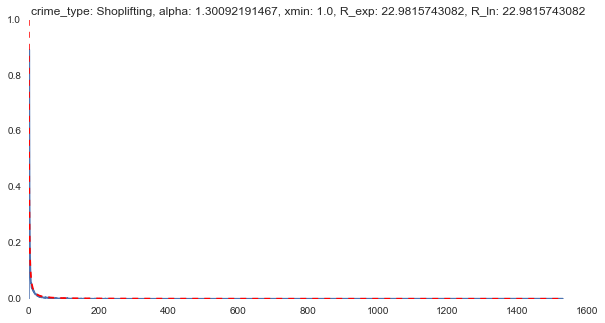

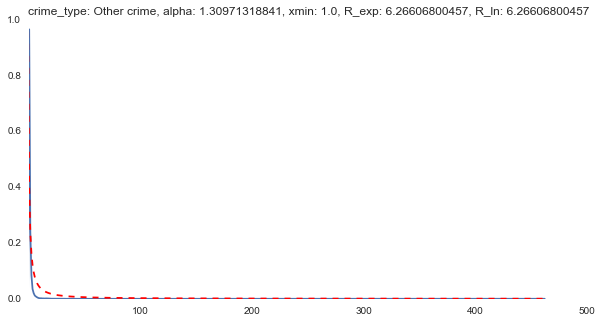

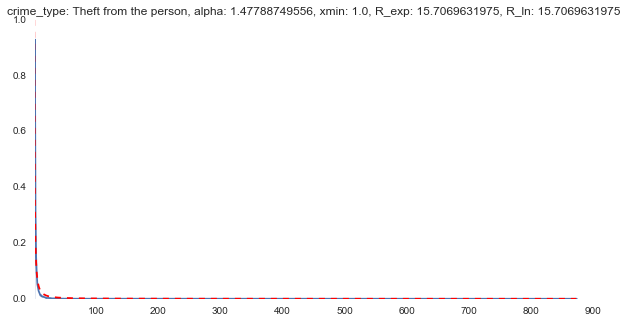

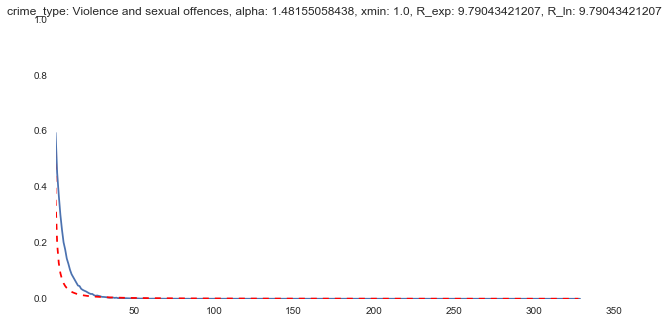

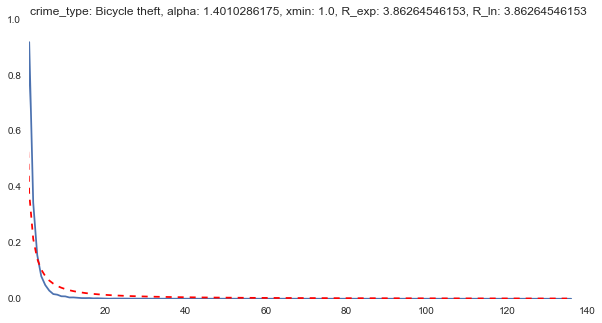

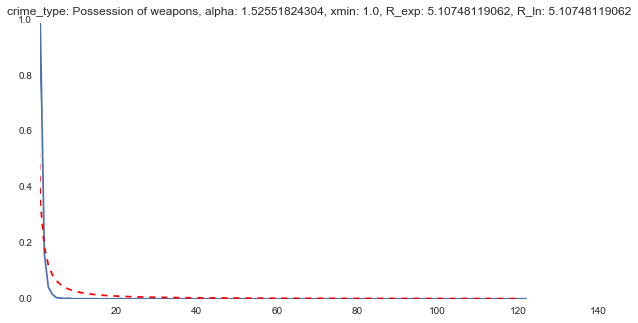

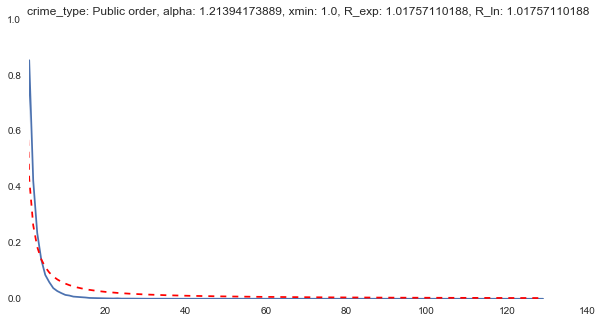

In [42]:
alphas = dict()

for crime_type in crime_types:
    temp = crimes_count[crimes_count['Crime type'] == crime_type]
    pl_fit_and_plot(temp, crime_type=crime_type)

Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit


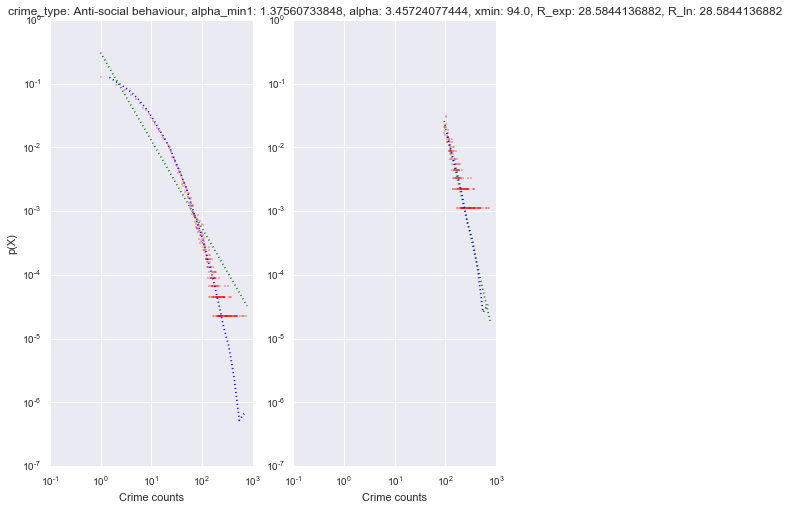

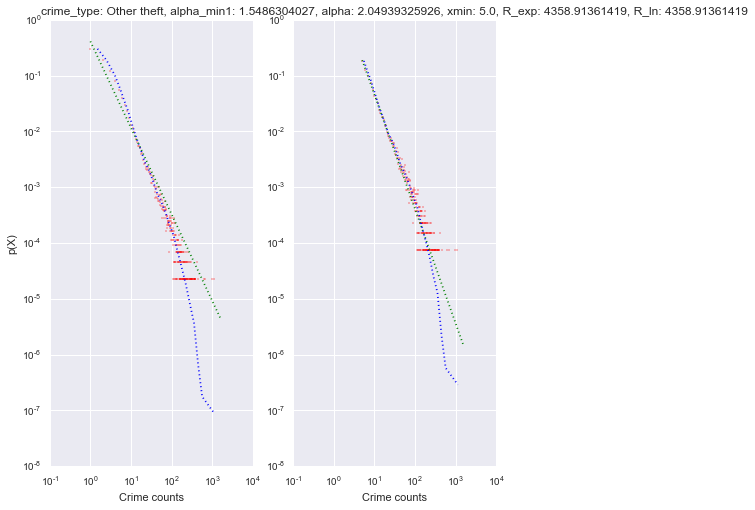

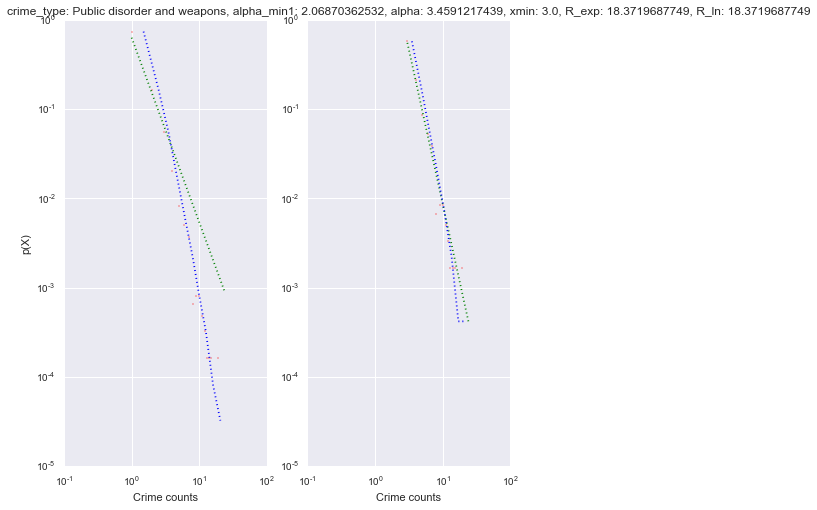

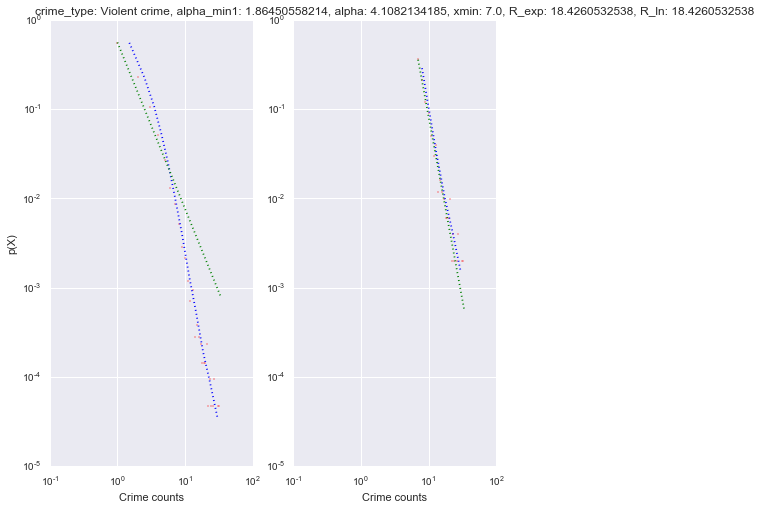

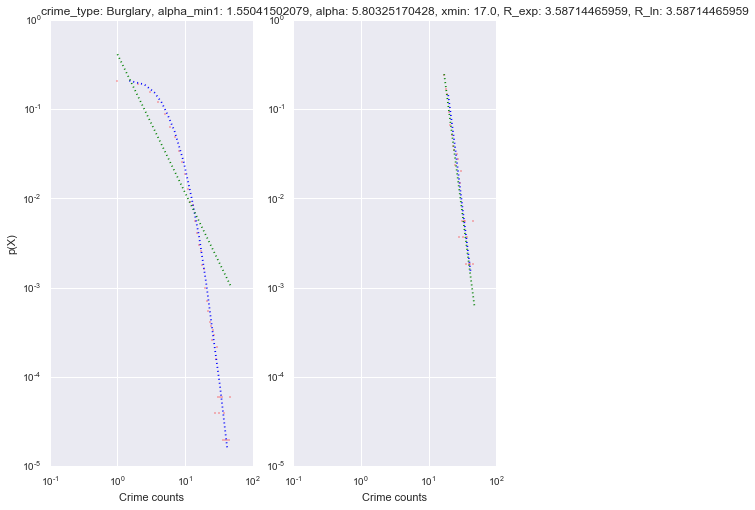

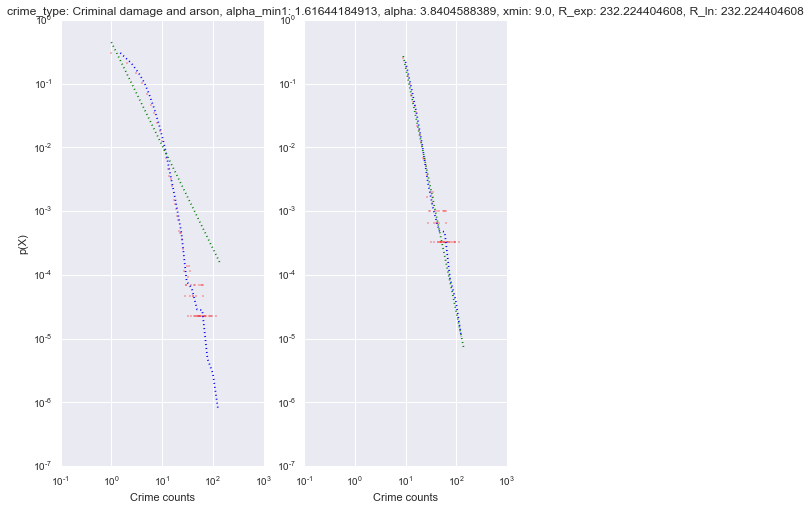

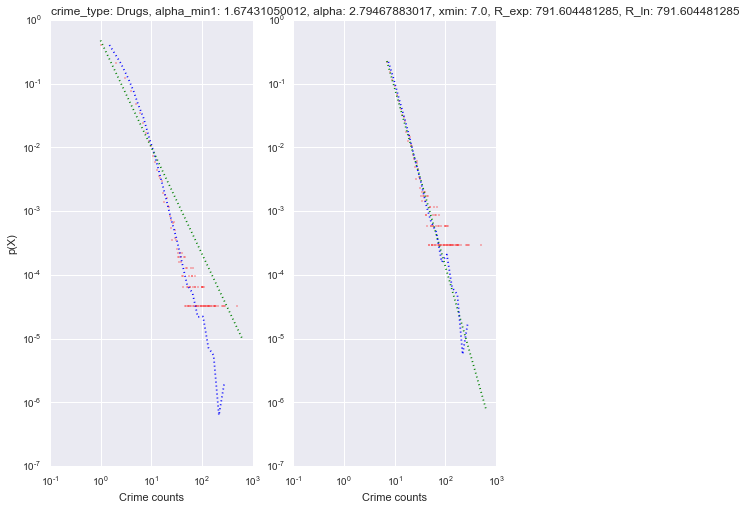

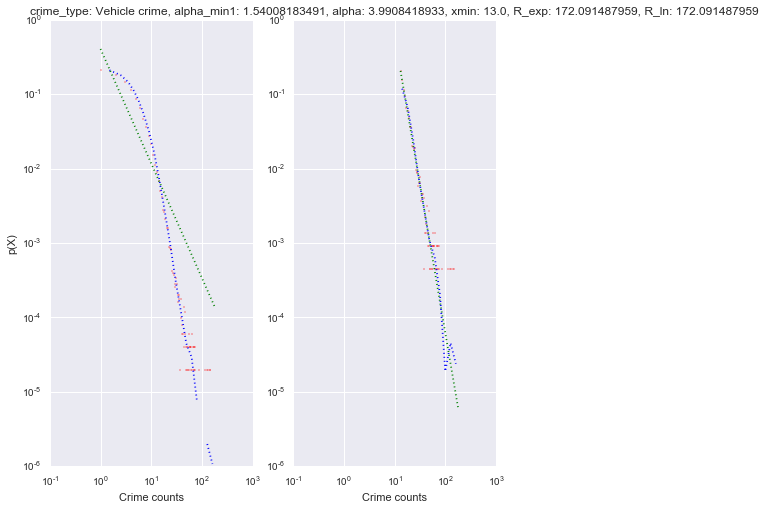

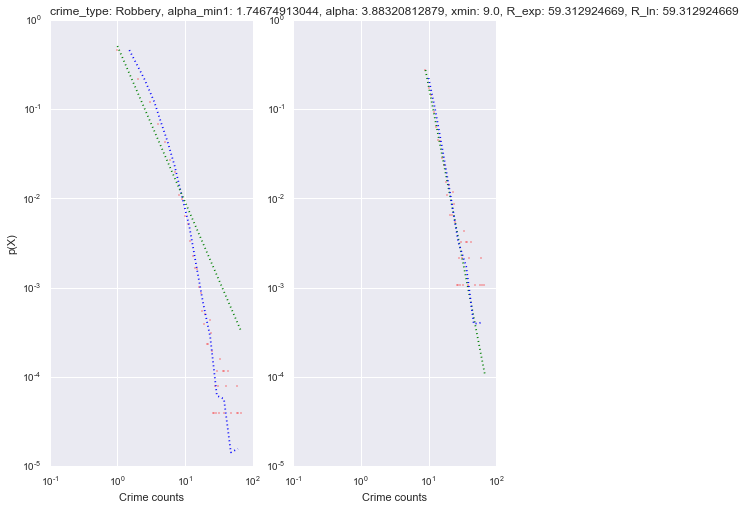

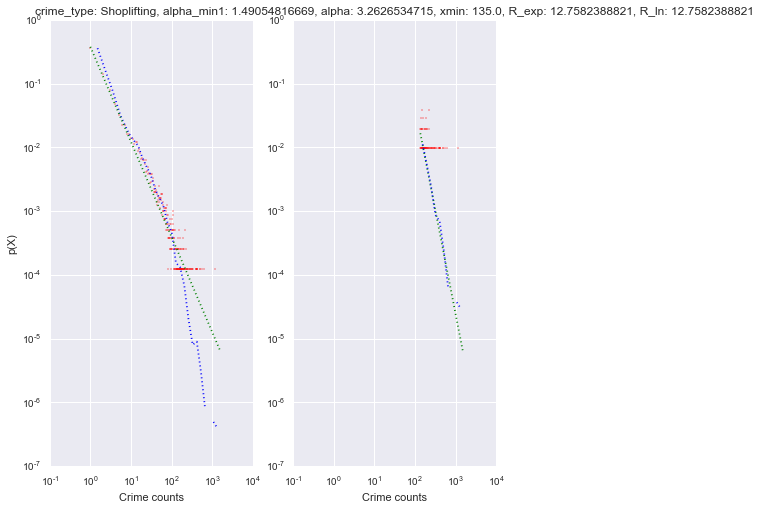

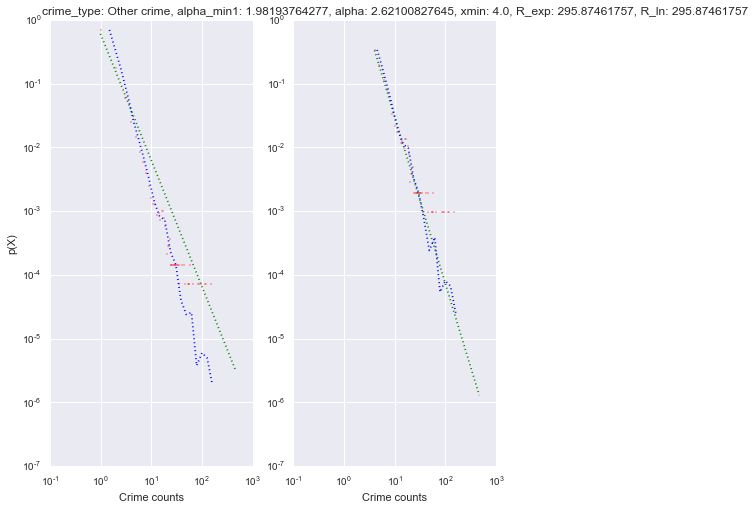

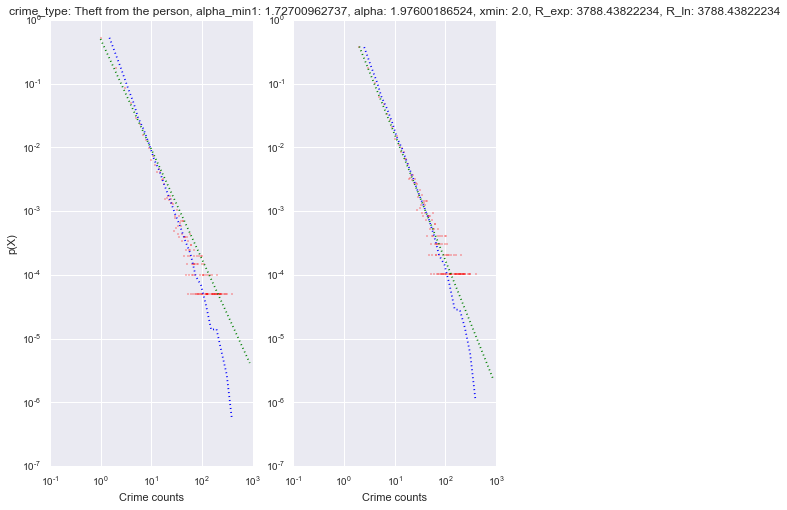

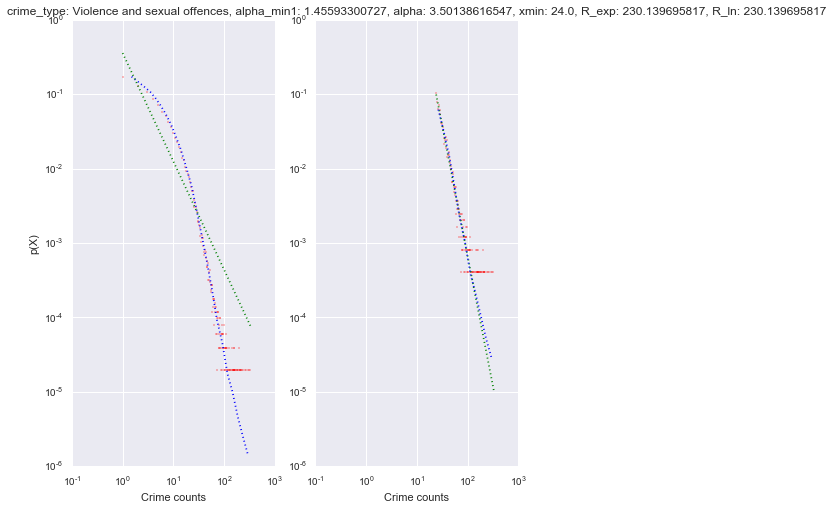

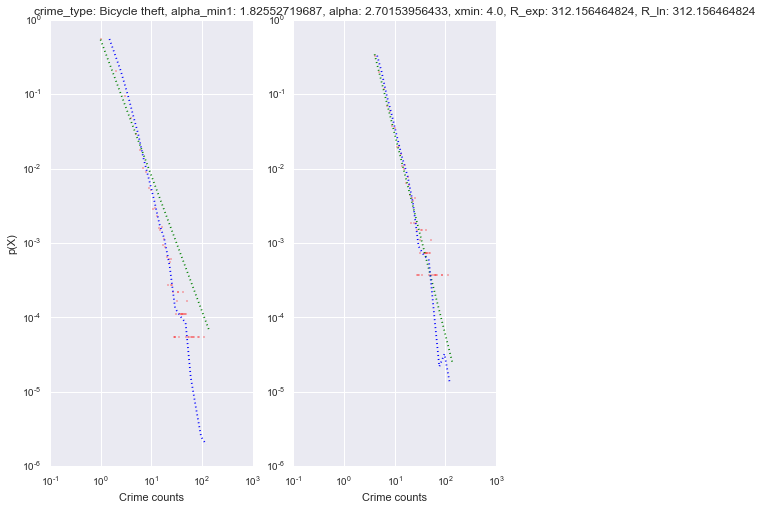

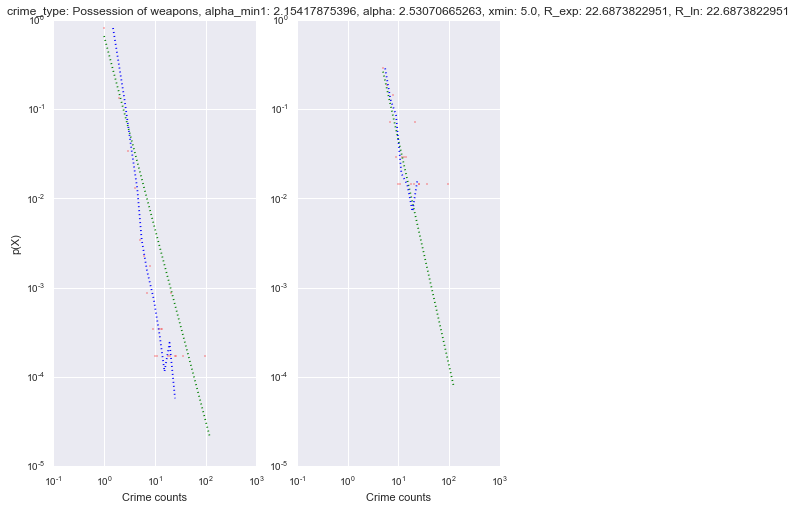

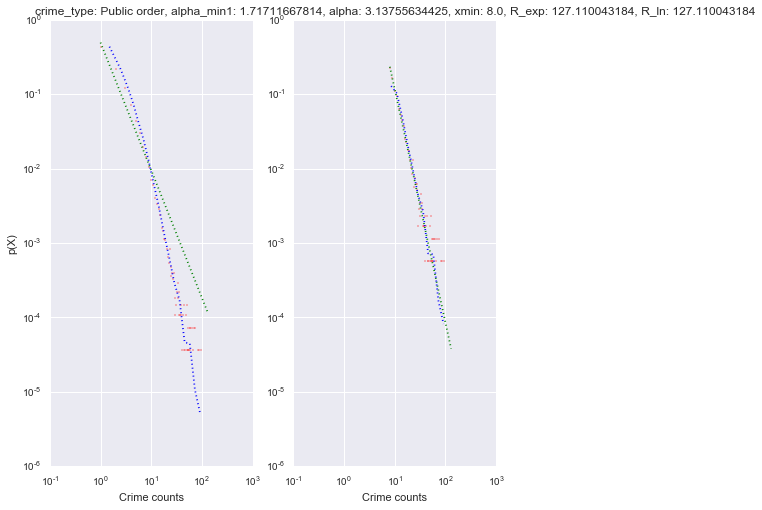

In [50]:
for crime_type in crime_types:
    temp = crimes_count[crimes_count['Crime type'] == crime_type]
    plot_basics(temp, crime_type)

Based on the http://www-bcf.usc.edu/~dkempe/teaching/structure-dynamics.pdf, p60-61

the higher the probability of preferential attachment the lower the exponent

The problem is that the data doesn't span multiple orders of magnitude

In [51]:
import operator
sorted_alphas = sorted(alphas.items(), key=operator.itemgetter(1))
sorted_alphas

[('Theft from the person', 1.976001865244819),
 ('Other theft', 2.0493932592596287),
 ('Possession of weapons', 2.5307066526301165),
 ('Other crime', 2.6210082764465739),
 ('Bicycle theft', 2.7015395643343965),
 ('Drugs', 2.7946788301719518),
 ('Public order', 3.1375563442506733),
 ('Shoplifting', 3.2626534714976603),
 ('Anti-social behaviour', 3.4572407744388056),
 ('Public disorder and weapons', 3.4591217438950363),
 ('Violence and sexual offences', 3.5013861654653211),
 ('Criminal damage and arson', 3.8404588389041026),
 ('Robbery', 3.8832081287935565),
 ('Vehicle crime', 3.9908418933016319),
 ('Violent crime', 4.1082134185004486),
 ('Burglary', 5.8032517042827187)]

Does different coefficient in the power law suggest different clustering behaviour?